In [19]:
import pandas  as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import selenium
import feedparser
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.by import By 
import requests as req
from bs4 import BeautifulSoup as bs    # ambos alias son cosa mia
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from selenium.webdriver.chrome.options import Options
# opciones del driver

opciones=Options()

# quita la bandera de ser robot
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)

opciones.headless=False   # si True, no aparece la ventana (headless=no visible)

opciones.add_argument('--start-maximized')         # comienza maximizado

#opciones.add_argument('--incognito')              # incognito


In [3]:
from webdriver_manager.chrome import ChromeDriverManager

PATH=ChromeDriverManager().install()

[WDM] - Downloading: 100%|██████████| 8.84M/8.84M [00:00<00:00, 32.0MB/s]


In [4]:
import time   # para manejar tiempo

from selenium.webdriver.support.ui import WebDriverWait   # es para esperar

from selenium.webdriver.support import expected_conditions as EC  # condiciones esperadas...

from selenium.webdriver import ActionChains as AC   # acciones encadenadas, rollo doble click

from selenium.webdriver.common.keys import Keys  # manejar teclas

GET COLUMNS FROM NASA

In [309]:
url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars'

In [310]:
driver=webdriver.Chrome(PATH, options=opciones)
html=req.get(url).content   # o .text


In [311]:
driver.get(url)

In [164]:
columnsraw = driver.find_elements(By.CSS_SELECTOR, 'div.hdrcell')

In [165]:
columnas = [e.text for e in columnsraw]

In [166]:
columnas  = columnas[2:8]

In [167]:
columnas

['  Planet Name',
 '  Number of Planets',
 '  Insolation Flux [Earth Flux]',
 '  Inclination [deg]',
 '  Stellar Surface Gravity [log10(cm/s**2)]',
 '  Stellar Age [Gyr]']

In [168]:
new = []
for e in columnas:
    new.append(e[2:].lower().replace(' ','_'))

In [169]:
columnas = new

In [170]:
columnas

['planet_name',
 'number_of_planets',
 'insolation_flux_[earth_flux]',
 'inclination_[deg]',
 'stellar_surface_gravity_[log10(cm/s**2)]',
 'stellar_age_[gyr]']

GET DATA FROM DATABASE

In [171]:
tabla1 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [178]:
tabla2 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [15]:
tabla3 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [172]:
ggggg1 =  tabla1.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [175]:
nasa11 = [i.text for i in ggggg1]

In [22]:
#nasa1

In [176]:
zusatzcolumns = pd.DataFrame(data=nasa11)

In [177]:
zusatzcolumns.to_csv('zusatz1.csv')

In [179]:
bbbbb2 =  tabla2.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [180]:
nosa22 = [i.text for i in bbbbb2]

In [181]:
part22 = pd.DataFrame(data=nosa22)

In [182]:
part22.to_csv('zusatz2.csv')

In [16]:
aaaaa3 =  tabla3.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [17]:
nisa3 = [i.text for i in aaaaa3]

In [18]:
part3 = pd.DataFrame(data=nisa3)

In [19]:
part3.to_csv('part3.csv')

In [20]:
tabla4 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [21]:
ccccc4 =  tabla4.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [22]:
nesa4 = [i.text for i in ccccc4]

In [23]:
part4 = pd.DataFrame(data=nesa4)

In [24]:
part4.to_csv('part4.csv')

In [25]:
tabla5 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [26]:
ddddd5 =  tabla5.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [27]:
nusa5 = [i.text for i in ddddd5]

In [28]:
part5 = pd.DataFrame(data=nusa5)

In [29]:
part5.to_csv('part5.csv')

In [32]:
firstpart = pd.read_csv('part1.csv')
secondpart = pd.read_csv('part2.csv')
thirdpart = pd.read_csv('part3.csv')
fourthpart = pd.read_csv('part4.csv')
fifthpart = pd.read_csv('part5.csv')

In [35]:
firstpart = firstpart.drop(columns=['Unnamed: 0'])
secondpart = secondpart.drop(columns=['Unnamed: 0'])
thirdpart = thirdpart.drop(columns=['Unnamed: 0'])
fourthpart = fourthpart.drop(columns=['Unnamed: 0'])
fifthpart = fifthpart.drop(columns=['Unnamed: 0'])

In [50]:
firstpart = firstpart.rename(columns={firstpart.columns[0]: 'data'})
secondpart = secondpart.rename(columns={secondpart.columns[0]: 'data'})
thirdpart = thirdpart.rename(columns={thirdpart.columns[0]: 'data'})
fourthpart = fourthpart.rename(columns={fourthpart.columns[0]: 'data'})
fifthpart = fifthpart.rename(columns={fifthpart.columns[0]: 'data'})

In [51]:
data1 = list(firstpart['data'])
data2 = list(secondpart['data'])
data3 = list(thirdpart['data'])
data4 = list(fourthpart['data'])
data5 = list(fifthpart['data'])

In [56]:
len(data1), len(data2), len(data3), len(data4), len(data5)

(20178, 19278, 20106, 18900, 25344)

In [58]:
firstback = firstpart.copy()
secondback = secondpart.copy()
thirdback = thirdpart.copy()
fourthback = fourthpart.copy()
fifthback = fifthpart.copy()

In [60]:
firstback.to_csv('firstback.csv')
secondback.to_csv('secondback.csv')
thirdback.to_csv('thirdback.csv')
fourthback.to_csv('fourthback.csv')
fifthback.to_csv('fifthback.csv')

In [69]:
data1 = data1[2:]
data2 = data2[2:]
data3 = data3[2:]
data4 = data4[2:]
data5 = data5[2:]

In [84]:
test = data1

In [96]:
type(test[16])

float

In [109]:
def deletenan(dataset):
    new = []
    for i in dataset:
        if type(i) != float:
            new.append(i)
    return new

In [114]:
data1 = deletenan(data1)
data2 = deletenan(data2)
data3 = deletenan(data3)
data4 = deletenan(data4)
data5 = deletenan(data5)

In [143]:
data3[15:30]

['11 UMi b',
 '11 UMi',
 '516.21997000',
 '1.530000',
 '12.300',
 '4684.81420',
 '13.800000',
 '0.080000',
 ' ',
 ' ',
 '4213.00',
 '29.79',
 '2.78',
 '-0.020',
 '125.3210000']

In [155]:
#divide la lista en sublistas de 15 elementos. we use yield because we want to return a generator. a generator is an object that can be iterated over (one value at a time). 
#the difference to simply a return is that the generator does not store the values in memory, it generates them on the fly. this is a huge advantage when dealing with large datasets. the yield keyword is used like return, except the function will return a generator.

def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

data1 = list(divide_chunks(data1, 15))
data2 = list(divide_chunks(data2, 15))
data3 = list(divide_chunks(data3, 15))
data4 = list(divide_chunks(data4, 15))
data5 = list(divide_chunks(data5, 15))

In [151]:
firstdf = pd.DataFrame(data1, columns=columnas)
seconddf = pd.DataFrame(data2, columns=columnas)
thirddf = pd.DataFrame(data3, columns=columnas)
fourthdf = pd.DataFrame(data4, columns=columnas)
fifthdf = pd.DataFrame(data5, columns=columnas)

In [154]:
len(firstdf) + len(seconddf) + len(thirddf) + len(fourthdf) + len(fifthdf)

5767

In [157]:
#concatenamos los dataframes
exo = pd.concat([firstdf, seconddf, thirddf, fourthdf, fifthdf], ignore_index=True)

In [160]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius_[earth_radius],planet_mass_or_mass*sin(i)_[earth_mass],planet_density_[g/cm**3],eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [159]:
exo.to_csv('exo.csv')

In [161]:
backup_exo = exo.copy()

In [162]:
backup_exo.to_csv('backup_exo.csv')

INTEGRATE EXTRA DATA

In [186]:
data1 = nasa11[2:]
data2 = nosa22[2:]

In [188]:
def deletenan(dataset):
    new = []
    for i in dataset:
        if i != '':
            new.append(i)
    return new

In [191]:
data1 = deletenan(data1)
data2 = deletenan(data2)

In [200]:
data1[6:12]

['11 UMi b', '1', ' ', ' ', '1.93', '1.560']

In [202]:
def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [205]:
data1 = list(divide_chunks(data1, 6))
data2 = list(divide_chunks(data2, 6))

In [207]:
len(data2), len(data1)

(2372, 3034)

In [208]:
firstzusatz = pd.DataFrame(data1, columns=columnas)
secondzusatz = pd.DataFrame(data2, columns=columnas)

In [230]:
finalextra = pd.concat([firstzusatz, secondzusatz], ignore_index=True)

In [231]:
finalextra

,planet_name,number_of_planets,insolation_flux_[earth_flux],inclination_[deg],stellar_surface_gravity_[log10(cm/s**2)],stellar_age_[gyr]
0,11 Com b,1,,,2.31,
1,11 UMi b,1,,,1.93,1.560
2,14 And b,1,,,2.63,4.500
3,14 Her b,2,,144.652,4.45,3.900
4,16 Cyg B b,1,,,4.36,7.400
...,...,...,...,...,...,...
5401,Kepler-1784 b,1,64.80,89.510,4.41,13.800
5402,Kepler-1783 b,1,331.35,89.350,3.88,13.900
5403,Kepler-1782 b,1,84.16,87.610,4.61,14.000
5404,Kepler-1781 b,1,239.11,89.550,4.50,0.900


In [225]:
finalextra = finalextra.drop(columns=['Unnamed: 0'])

In [211]:
finalextra.to_csv('finalzusatz.csv')

In [232]:
finalextra = pd.read_csv('finalzusatz.csv')

CLEAN EXTRADATA

In [233]:
finalextra = finalextra.rename(columns={'stellar_surface_gravity_[log10(cm/s**2)]': 'stellar_surface_gravity','insolation_flux_[earth_flux]': 'insolation_flux_earth'})

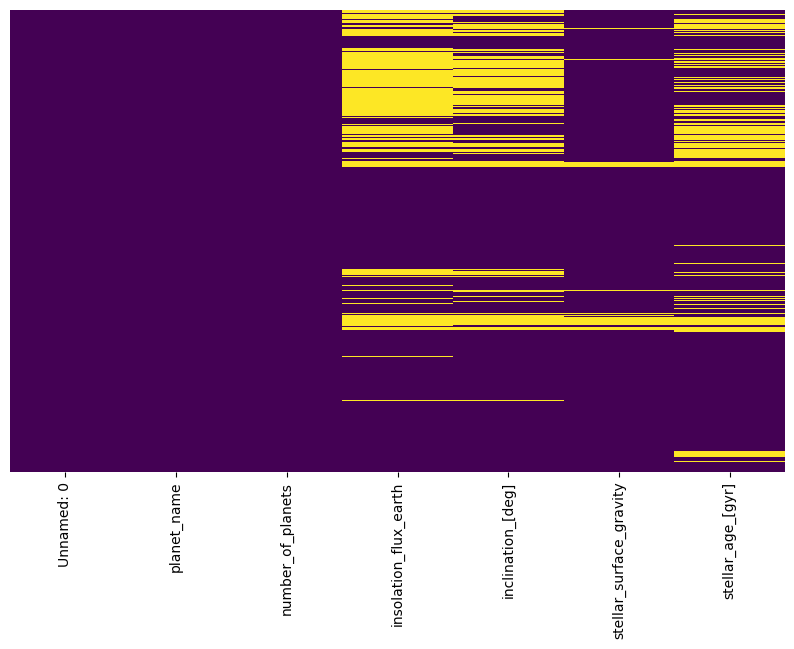

In [234]:
plt.figure(figsize=(10, 6))  

sns.heatmap(finalextra == ' ',   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [235]:
finalextra = finalextra.drop_duplicates(subset=['planet_name'])

In [239]:
backup_finalextra = finalextra.copy()

In [240]:
backup_finalextra.to_csv('backup_finalextra.csv')

In [260]:
extra2 = finalextra.copy()

In [261]:
extra2 = extra2.drop(columns=['planet_name'])

In [262]:
extra2 = extra2.replace(' ', np.nan)

In [263]:
for i in extra2.columns:
    extra2[i] = extra2[i].astype(float)

In [264]:
def nancheck(row):
    for i in row:
        if np.isnan(i):
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
extra2['nancheck'] = extra2.apply(nancheck, axis=1)

In [265]:
extra2.nancheck.value_counts()

False    3282
True     2018
Name: nancheck, dtype: int64

In [266]:
extra2 = extra2[extra2['nancheck'] == False]

In [267]:
extra2 = extra2.drop(columns=['nancheck'])

In [268]:
extra2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3282 entries, 30 to 5299
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_of_planets        3282 non-null   float64
 1   insolation_flux_earth    3282 non-null   float64
 2   stellar_surface_gravity  3282 non-null   float64
 3   stellar_age_[gyr]        3282 non-null   float64
dtypes: float64(4)
memory usage: 128.2 KB


In [259]:
finalextra = finalextra.drop(columns=['inclination_[deg]'])

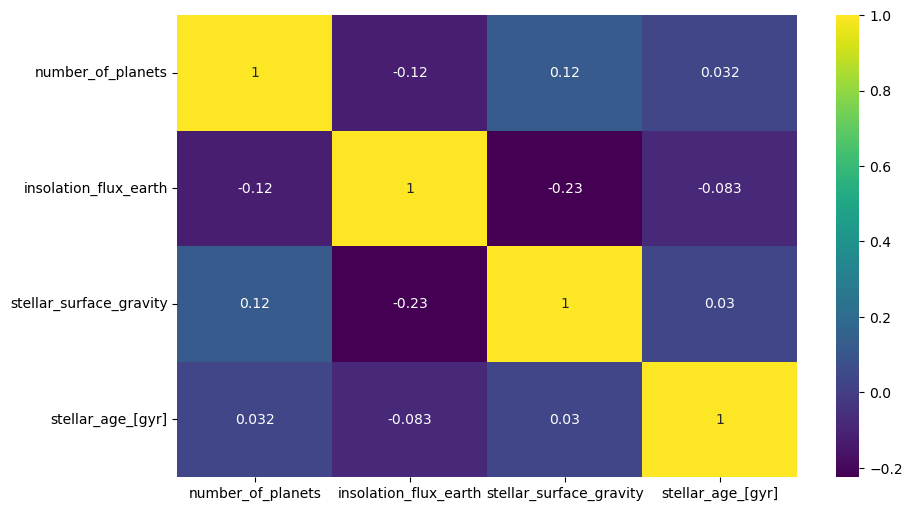

In [269]:
plt.figure(figsize=(10, 6))
sns.heatmap(extra2.corr(), annot=True, cmap='viridis')
plt.show()

CLEAN DATA

In [8]:
exo = pd.read_csv('exo.csv')

In [10]:
exo = exo.rename(columns={'planet_radius_[earth_radius]': 'planet_radius', 'planet_mass_or_mass*sin(i)_[earth_mass]': 'planet_mass', 'planet_density_[g/cm**3]': 'planet_density'})

In [12]:
exo.to_csv('exocleancolumn.csv')

In [13]:
exo.head()

,Unnamed: 0,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [15]:
exo = exo.drop(columns=['Unnamed: 0'])

In [17]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [18]:
exo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   planet_name                                 5767 non-null   object
 1   host_name                                   5767 non-null   object
 2   orbital_period_[days]                       5767 non-null   object
 3   orbit_semi-major_axis_[au])                 5767 non-null   object
 4   planet_radius                               5767 non-null   object
 5   planet_mass                                 5767 non-null   object
 6   planet_density                              5767 non-null   object
 7   eccentricity                                5767 non-null   object
 8   equilibrium_temperature_[k]                 5767 non-null   object
 9   ratio_of_semi-major_axis_to_stellar_radius  5767 non-null   object
 10  stellar_effective_temper

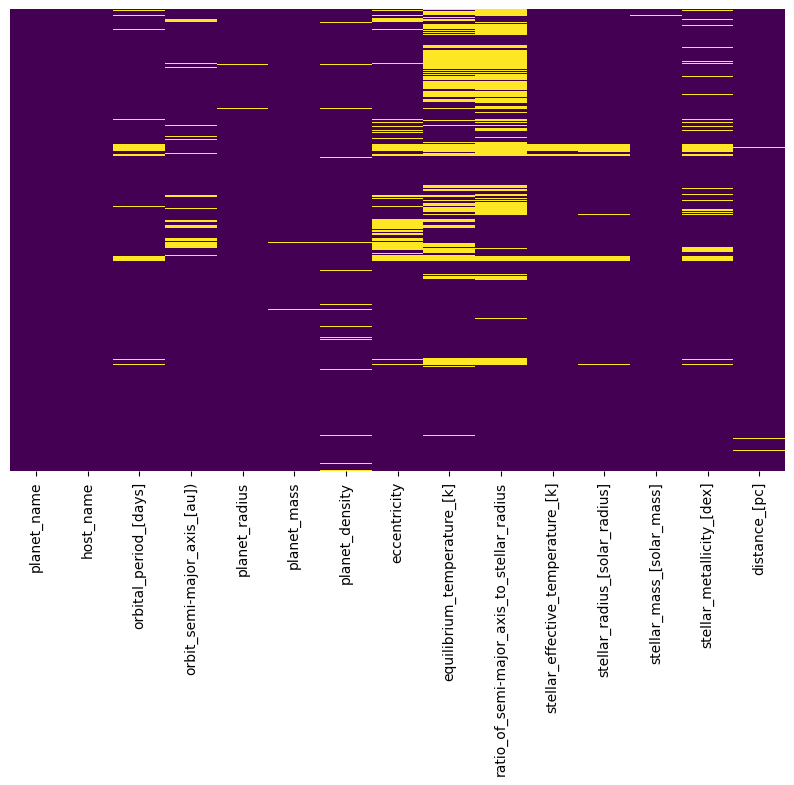

In [29]:
plt.figure(figsize=(10, 6))  

sns.heatmap(exo == ' ',   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [42]:
test = exo.copy()

In [50]:
#en primer lugar, vamos a eliminar las filas que son dobles. es decir, que tienen el mismo nombre de planeta y el mismo nombre de estrella y mas.
test = test.drop_duplicates(subset=['planet_name', 'host_name', 'planet_radius', 'planet_mass', 'planet_density'])

In [97]:
test['Datetest'] = test['orbit_semi-major_axis_[au])'].str[0]
algo = test[test['Datetest'] == 'K']
print(len(algo))
#shark = shark.drop(algo.index)

1


In [52]:
exo = test.copy()

In [53]:
backup_exo = exo.copy()

In [55]:
exo.to_csv('exodropduplicate.csv')

In [56]:
# ahora queremos ver si hay filas que tienen al menos un valor nulo. para ello, vamos a crear una columna que nos diga si hay algun valor nulo en la fila o no.
# para ello, vamos a crear una funcion que nos diga si hay algun valor nulo en la fila o no. si hay algun valor nulo, devolvera True, si no, devolvera False.
def nancheck(row):
    for i in row:
        if i == ' ':
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
exo['nancheck'] = exo.apply(nancheck, axis=1)


In [59]:
exo

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],Datetest,nancheck
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000,11 Com b,True
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000,11 UMi b,True
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000,14 And b,True
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000,14 Her b,True
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000,16 Cyg B b,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000,Kepler-228 d,False
5754,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 b,False
5755,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 c,False
5756,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 d,False


In [58]:
exo.nancheck.value_counts()

False    3282
True     1984
Name: nancheck, dtype: int64

In [63]:
#ahora eliminamos la nancheck columna
exo = exo.drop(columns=['nancheck', 'Datetest'])

In [64]:
exo

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000
5754,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000
5755,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000
5756,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000


In [68]:
#ahora queremos ver los correlaciones entre las variables numericas. para ello, vamos a crear un heatmap.
exo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5266 entries, 0 to 5757
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   planet_name                                 5266 non-null   object
 1   host_name                                   5266 non-null   object
 2   orbital_period_[days]                       5266 non-null   object
 3   orbit_semi-major_axis_[au])                 5266 non-null   object
 4   planet_radius                               5266 non-null   object
 5   planet_mass                                 5266 non-null   object
 6   planet_density                              5266 non-null   object
 7   eccentricity                                5266 non-null   object
 8   equilibrium_temperature_[k]                 5266 non-null   object
 9   ratio_of_semi-major_axis_to_stellar_radius  5266 non-null   object
 10  stellar_effective_temper

In [98]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [242]:
# now first we waant to detect false rows. we will do this by checking if the first character of the column 'orbit_semi-major_axis_[au])' is a number or not. if it is not a number, we will display the row, and then we will decide if we want to drop it or not.
zahl = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' ']
exo['Datetest'] = exo['planet_radius'].str[0]
algo = exo[exo['Datetest'].isin(zahl) == False] 
print(len(algo.index))
# now we will show the rows that we want to drop
algo

# now we will drop the rows that we want to drop
#exo = exo.drop(algo.index)

0


,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],Datetest


In [241]:
exo

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000
5754,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000
5755,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000
5756,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000


In [138]:
#ahora hacemos una copia del dataframe para trabajar con ella. en esa copia no queremos columnas que no sean numericas. esas son las columnas planet_name y host_name.
exo2 = exo.copy()
exo2 = exo2.drop(columns=['planet_name', 'host_name'])


In [139]:
exo2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000
5754,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000
5755,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000
5756,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000


In [140]:
#ahora vamos a ver las correlaciones entre las variables numericas. para ello, vamos a crear un heatmap. pero en primer lugar cambiamos los tipos de las variables numericas a float.
# pero antes, sustituimos todo lo que no es numerico por nulos y luego convertimos los nulos en ceros.
exo2 = exo2.replace(' ', np.nan)
# ahora convertimos los nulos en ceros

In [141]:
exo2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5265 entries, 0 to 5757
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   orbital_period_[days]                       5050 non-null   object
 1   orbit_semi-major_axis_[au])                 4982 non-null   object
 2   planet_radius                               5248 non-null   object
 3   planet_mass                                 5245 non-null   object
 4   planet_density                              5153 non-null   object
 5   eccentricity                                4560 non-null   object
 6   equilibrium_temperature_[k]                 3882 non-null   object
 7   ratio_of_semi-major_axis_to_stellar_radius  3848 non-null   object
 8   stellar_effective_temperature_[k]           5081 non-null   object
 9   stellar_radius_[solar_radius]               5061 non-null   object
 10  stellar_mass_[solar_mass

In [142]:
for i in exo2.columns:
    exo2[i] = exo2[i].astype(float)

In [148]:
#ahora cambiamos la funcion nancheck para que nos dice si hay un valur nan en la fila o no. si hay algun valor nan, devolvera True, si no, devolvera False.
def nancheck(row):
    for i in row:
        if np.isnan(i):
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
exo2['nancheck'] = exo2.apply(nancheck, axis=1)

In [149]:
exo2.nancheck.value_counts()

False    3281
True     1984
Name: nancheck, dtype: int64

In [150]:
exo2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],nancheck
0,326.030000,1.290000,12.10,6165.60000,19.100,0.231000,NaN,NaN,4742.0,19.00,2.70,-0.350,93.1846,True
1,516.219970,1.530000,12.30,4684.81420,13.800,0.080000,NaN,NaN,4213.0,29.79,2.78,-0.020,125.3210,True
2,185.840000,0.830000,12.90,1525.50000,3.900,0.000000,NaN,NaN,4813.0,11.00,2.20,-0.240,75.4392,True
3,1765.038901,2.773069,12.60,2586.74645,7.110,0.372689,NaN,NaN,5338.0,0.93,0.91,0.405,17.9323,True
4,798.500000,1.660000,13.50,565.73740,1.260,0.680000,NaN,NaN,5750.0,1.13,1.08,0.060,21.1397,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,11.094286,0.101000,4.04,15.40000,1.280,0.000000,835.0,10.900,6043.0,1.01,0.95,-0.030,1644.6100,False
5754,6.252972,0.062000,2.20,5.48000,2.830,0.000000,823.0,18.940,5120.0,0.73,0.80,0.160,826.2650,False
5755,16.068638,0.117000,4.92,21.50000,0.992,0.000000,600.0,36.850,5120.0,0.73,0.80,0.160,826.2650,False
5756,41.194912,0.220000,3.85,14.20000,1.370,0.000000,439.0,70.750,5120.0,0.73,0.80,0.160,826.2650,False


In [174]:
exo2.to_csv('exo_correlation.csv')

In [151]:
#ahora para hacer el heatmap y por eso que tiene sentido, solo usamos las filas que no tienen valores nulos.
exo2 = exo2.dropna()
# eso es porque si hay valores nulos, el heatmap no tiene sentido. dropna hace que si hay algun valor nulo en la fila, la fila se elimine.
#ahora eliminamos la nancheck columna
exo2 = exo2.drop(columns=['nancheck'])

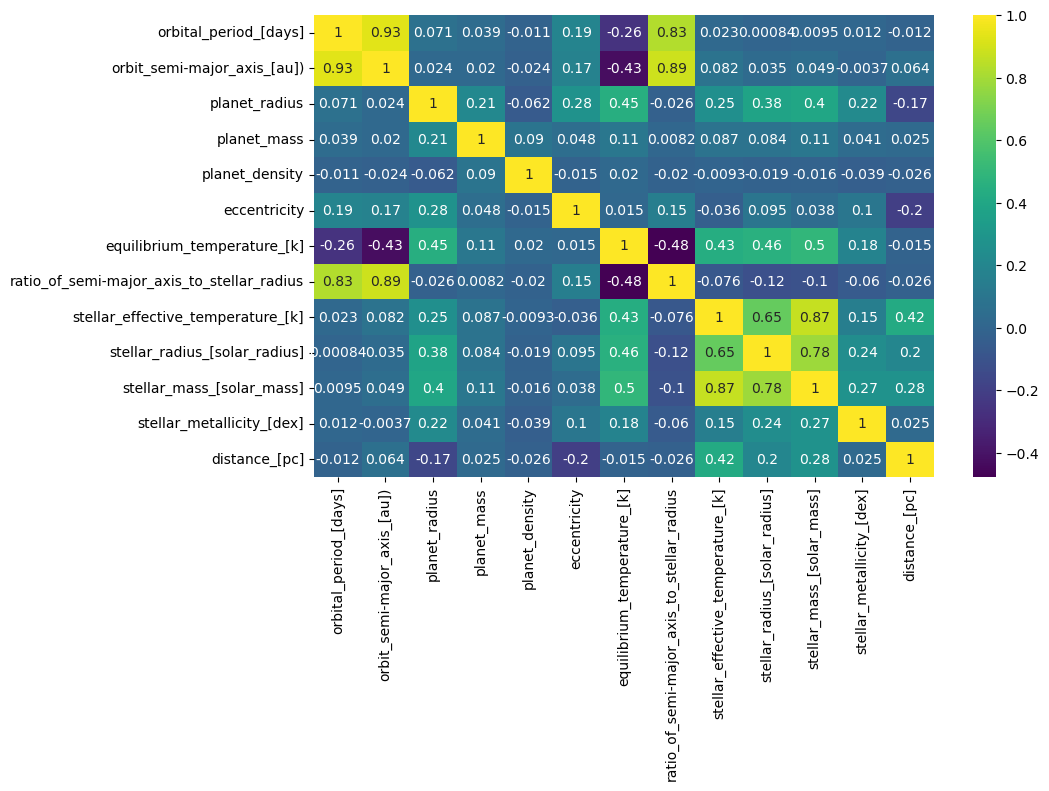

In [154]:
#eso funciona ahora porque no hay valores nulos en el dataframe.
#ahora vamos a crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(exo2.corr(), annot=True, cmap='viridis')
plt.show()

NOW SET BOTH DATAFRAMES TOGETHER TO SEE COMPLETE CORRELATIONS AND PREPARE FOR POSSIBLE MACHINE LEARNING

In [271]:
exo = exo.drop(columns=['Datetest'])

In [277]:
# ahora queremos hacer un join de dos dataframes, que son exo y finalextra. para ello, vamos a hacer un join de los dos dataframes por el nombre del planeta.
# primero, vamos a renombrar las columnas de extra2 para que no haya columnas con el mismo nombre en los dos dataframes.
finalextra = finalextra.rename(columns={'planet_name': 'planet_name2'})

In [279]:
#ahora hacemos el join
exo_join = exo.merge(finalextra, how='left', left_on='planet_name', right_on='planet_name2')

In [280]:
exo_join

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],planet_name2,number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000,11 Com b,1,,2.31,
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000,11 UMi b,1,,1.93,1.560
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000,14 And b,1,,2.63,4.500
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000,14 Her b,2,,4.45,3.900
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000,16 Cyg B b,1,,4.36,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000,Kepler-228 d,3,122.78,4.47,0.300
5261,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 b,3,76.22,4.63,1.100
5262,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 c,3,21.64,4.63,1.100
5263,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 d,3,6.16,4.63,1.100


In [285]:
exo_join = exo_join.drop(columns=['planet_name2'])

In [286]:
exo_join.to_csv('exoplanets.csv')

In [287]:
backup_exoplanets_full = exo_join.copy()

In [288]:
backup_exoplanets_full.to_csv('backup_exoplanets_full.csv')

CLEAN JOINED DATA

In [290]:
# ahora queremos ver los correlaciones dentro de las columnas en el exo_join dataframe que hemos creado. para ello, vamos a crear un heatmap. pero empezamos con el limpieza de las filas. eso lo hacemos con la funcion nancheck que hemos creado antes.
#ahora hacemos una copia del dataframe para trabajar con ella. en esa copia no queremos columnas que no sean numericas. esas son las columnas planet_name y host_name.
exo_join2 = exo_join.copy()
exo_join2 = exo_join2.drop(columns=['planet_name', 'host_name'])

In [291]:
exo_join2 = exo_join2.replace(' ', np.nan)

In [293]:
for i in exo_join2.columns:
    exo_join2[i] = exo_join2[i].astype(float)

In [295]:
def nancheck(row):
    for i in row:
        if np.isnan(i):
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
exo_join2['nancheck'] = exo_join2.apply(nancheck, axis=1)

In [297]:
exo_join2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr],nancheck
0,326.030000,1.290000,12.10,6165.60000,19.100,0.231000,NaN,NaN,4742.0,19.00,2.70,-0.350,93.1846,1.0,NaN,2.31,NaN,True
1,516.219970,1.530000,12.30,4684.81420,13.800,0.080000,NaN,NaN,4213.0,29.79,2.78,-0.020,125.3210,1.0,NaN,1.93,1.56,True
2,185.840000,0.830000,12.90,1525.50000,3.900,0.000000,NaN,NaN,4813.0,11.00,2.20,-0.240,75.4392,1.0,NaN,2.63,4.50,True
3,1765.038901,2.773069,12.60,2586.74645,7.110,0.372689,NaN,NaN,5338.0,0.93,0.91,0.405,17.9323,2.0,NaN,4.45,3.90,True
4,798.500000,1.660000,13.50,565.73740,1.260,0.680000,NaN,NaN,5750.0,1.13,1.08,0.060,21.1397,1.0,NaN,4.36,7.40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,11.094286,0.101000,4.04,15.40000,1.280,0.000000,835.0,10.900,6043.0,1.01,0.95,-0.030,1644.6100,3.0,122.78,4.47,0.30,False
5261,6.252972,0.062000,2.20,5.48000,2.830,0.000000,823.0,18.940,5120.0,0.73,0.80,0.160,826.2650,3.0,76.22,4.63,1.10,False
5262,16.068638,0.117000,4.92,21.50000,0.992,0.000000,600.0,36.850,5120.0,0.73,0.80,0.160,826.2650,3.0,21.64,4.63,1.10,False
5263,41.194912,0.220000,3.85,14.20000,1.370,0.000000,439.0,70.750,5120.0,0.73,0.80,0.160,826.2650,3.0,6.16,4.63,1.10,False


In [296]:
exo_join2.nancheck.value_counts()

False    3026
True     2239
Name: nancheck, dtype: int64

In [301]:
exo_join2 = exo_join2.dropna()
exo_join2 = exo_join2.drop(columns=['nancheck'])

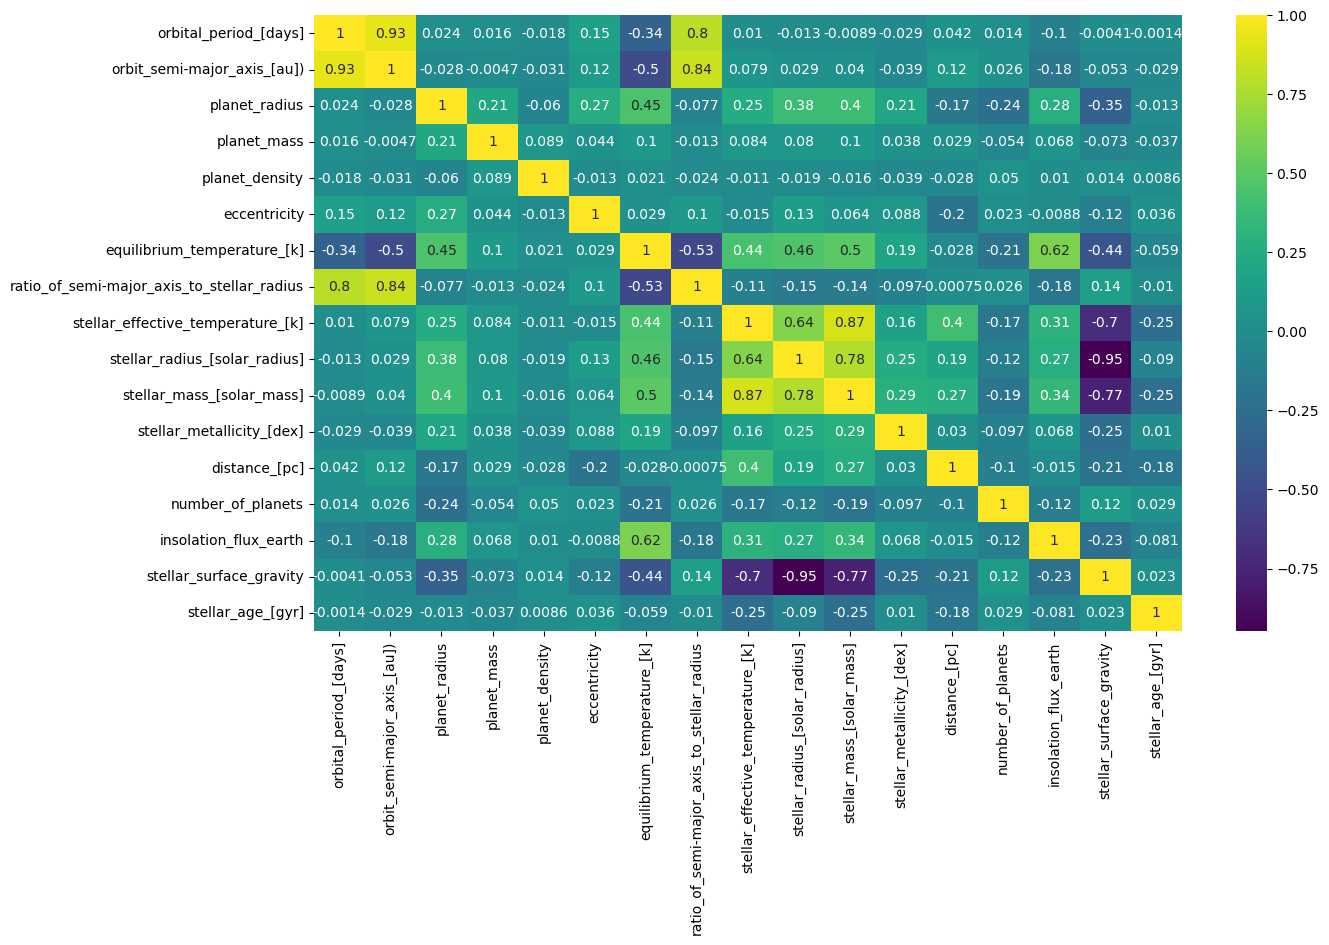

In [305]:
plt.figure(figsize=(14, 8))
sns.heatmap(exo_join2.corr(), annot=True, cmap='viridis')
plt.show()

In [306]:
exo_join2.to_csv('exo_join_correlaciones.csv')

In [307]:
backup_exojoin_correlaciones = exo_join2.copy()

In [308]:
backup_exojoin_correlaciones.to_csv('backup_exojoin_correlaciones.csv')